In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy import signal
from scipy.optimize import curve_fit
import random as random
import glob as glob
import os
import subprocess
from pandas import ExcelWriter
from pandas import ExcelFile
import ternary
import matplotlib.patches as patches
from matplotlib import collections, colors, transforms
import fnmatch
from pylab import *
import matplotlib.colors as mcolors
import re
import sys
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# Set Jupyter notebook display options
pd.options.display.max_rows = 25
pd.options.display.max_columns = 25


%matplotlib inline
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = "Helvetica" 
plt.rcParams['text.usetex'] = True 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.latex.preamble'] = r"\usepackage{sfmath}"
plt.rcParams['axes.titlesize'] = 14   # fontsize of the axes title
plt.rcParams['axes.labelsize'] = 14   # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 14   # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 14    # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 14    # legend fontsize
plt.rcParams['figure.titlesize'] = 14  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 300

In [8]:
#Set your path to the excel file where the sequential refinement data resides
excel_file = 'SequentialRefinement.xlsx'

In [9]:
Data = pd.read_excel(excel_file, sheet_name="Sheet11")

In [10]:
TempFiles=np.arange(1,384,1,dtype=int)

### Define an array that lists the temperatures.  
#Temperatures=np.array([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300])
TimeData=np.loadtxt('time.txt',dtype=float).T

### Make a spot in memory for a blank array of the file names
FileNames=[]
### Make a list of the file names:
for i in range(len(TempFiles)):	FileNames.append(str(TempFiles[i])+'.xye')

i=0
r,ObsIn,e = np.loadtxt(str(FileNames[i]),dtype=float,skiprows=6).T

Obs=np.zeros([len(FileNames),len(ObsIn)])

### Load in all of the data into an array of arrays:
for i in range(len(FileNames)):
    r,Obs[i],e = np.loadtxt(str(FileNames[i]),dtype=float,skiprows=6).T


In [11]:
WSFvsScanNumber = Data[['Scan Number', 'YCl$_3$', 'Na$_2$CO$_3$', 'Mn$_2$O$_3$', 'NaCl', 'YOCl', 'Y$_3$O$_4$Cl', 'Y$_2$O$_3$', 'P2-Na$_x$MnO$_2$','P3-Na$_x$MnO$_2$', 'Y$_2$Mn$_2$O$_7$', 'Na$_3$MnO$_4$']]
WSFvsTemp = Data[['Temperature', 'YCl$_3$', 'Na$_2$CO$_3$', 'Mn$_2$O$_3$', 'NaCl', 'YOCl', 'Y$_3$O$_4$Cl', 'Y$_2$O$_3$', 'P2-Na$_x$MnO$_2$','P3-Na$_x$MnO$_2$', 'Y$_2$Mn$_2$O$_7$', 'Na$_3$MnO$_4$']]
WSFvsTime = Data[['Time', 'YCl$_3$', 'Na$_2$CO$_3$', 'Mn$_2$O$_3$', 'NaCl', 'YOCl', 'Y$_3$O$_4$Cl', 'Y$_2$O$_3$', 'P2-Na$_x$MnO$_2$','P3-Na$_x$MnO$_2$','Y$_2$Mn$_2$O$_7$', 'Na$_3$MnO$_4$']]

Heating = WSFvsTemp[0:190]
Index_Heating = Heating.set_index('Temperature')
Dwell = WSFvsTime[190:384]
Index_Dwell = Dwell.set_index('Time')
fig = plt.figure(figsize=(10,7))
Time = WSFvsTime[0:190] 
Index_Time = Time.set_index('Time')



<Figure size 3000x2100 with 0 Axes>

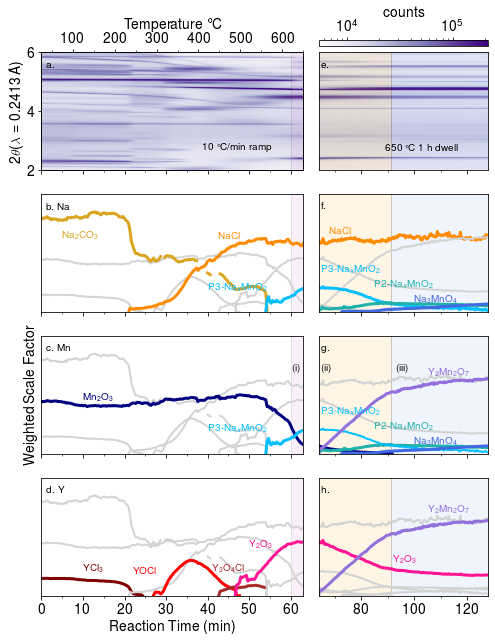

In [6]:
# Time dwell = 66 to 127
#Temp = 
Heating = WSFvsTemp[0:190]
Index_Heating = Heating.set_index('Temperature')
Dwell = WSFvsTime[190:384]
Index_Dwell = Dwell.set_index('Time')
# fig = plt.figure(figsize=(10,7))
Time = WSFvsTime[0:190] 
Index_Time = Time.set_index('Time')

fig = plt.figure(figsize=(8,10))


#ax5 is yttrium: Heating
ax5 = plt.subplot2grid((4, 5), (3, 0), colspan=3)
YCl3=Index_Time.plot(y='YCl$_3$', color='maroon', linewidth=3, ax=ax5, legend=False)
ax5.text(10, 2.5, 'YCl$_3$', color='maroon')
Na2CO3=Index_Time.plot(y='Na$_2$CO$_3$', color='lightgrey', ax=ax5, legend=False)
Mn2O3=Index_Time.plot(y='Mn$_2$O$_3$', color='lightgrey', ax=ax5, legend=False)
NaCl=Index_Time.plot(y='NaCl', color='lightgrey', ax=ax5, legend=False)
YOCl=Index_Time.plot(y='YOCl', color='red', linewidth=3, ax=ax5, legend=False)
ax5.text(22, 2.25, 'YOCl', color='red')
Y3O4Cl=Index_Time.plot(y='Y$_3$O$_4$Cl', color='brown', linewidth=3, ax=ax5, legend=False)
ax5.text(41, 2.5, 'Y$_3$O$_4$Cl', color='brown')
Y2O3=Index_Time.plot(y='Y$_2$O$_3$', color='deeppink', linewidth=3, ax=ax5, legend=False)
ax5.text(50, 4.9, 'Y$_2$O$_3$', color='deeppink')
P3NaxMnO2=Index_Time.plot(y='P3-Na$_x$MnO$_2$', color='lightgrey', ax=ax5, legend=False)
Y2Mn2O7_top=Index_Time.plot(y='Y$_2$Mn$_2$O$_7$', color='mediumpurple', ax=ax5, legend=False)
Na3MnO4_top=Index_Time.plot(y='Na$_3$MnO$_4$', color='lightgrey', ax=ax5, legend=False)
ax5.add_patch(patches.Rectangle((60, 0), 64, 16, edgecolor='black', facecolor='Orchid', alpha=0.1 ))
ax5.set_ylim(0,12)
ax5.set_xlim(0,63)
ax5.text(1, 10.5, 'd. Y', color='black')
ax5.set_yticks([])
# ax5.set_xlabel('')
ax5.set_xlabel('Reaction Time (min)')
ax5.xaxis.set_minor_locator(MultipleLocator(5))
ax5.xaxis.set_major_locator(MultipleLocator(10))

#ax6 is yttrium: Dwelling
ax6 = plt.subplot2grid((4, 5), (3, 3), colspan=2)
YCl3=Index_Dwell.plot(y='YCl$_3$', color='maroon', linewidth=3, ax=ax6, legend=False)
Na2CO3=Index_Dwell.plot(y='Na$_2$CO$_3$', color='lightgrey', ax=ax6, legend=False)
Mn2O3=Index_Dwell.plot(y='Mn$_2$O$_3$', color='lightgrey', ax=ax6, legend=False)
NaCl=Index_Dwell.plot(y='NaCl', color='lightgrey', ax=ax6, legend=False)
YOCl=Index_Dwell.plot(y='YOCl', color='lightgrey', ax=ax6, legend=False)
Y3O4Cl=Index_Dwell.plot(y='Y$_3$O$_4$Cl', color='lightgrey', ax=ax6, legend=False)
Y2O3=Index_Dwell.plot(y='Y$_2$O$_3$', color='deeppink', linewidth=3, ax=ax6, legend=False)
ax6.text(92, 3.4, 'Y$_2$O$_3$', color='deeppink')
P2NaxMnO2=Index_Dwell.plot(y='P2-Na$_x$MnO$_2$', color='lightgrey', ax=ax6, legend=False)
P3NaxMnO2=Index_Dwell.plot(y='P3-Na$_x$MnO$_2$', color='lightgrey', ax=ax6, legend=False)
Y2Mn2O7_top=Index_Dwell.plot(y='Y$_2$Mn$_2$O$_7$', color='mediumpurple', linewidth=3, ax=ax6, legend=False)
ax6.text(105, 8.5, 'Y$_2$Mn$_2$O$_7$', color='mediumpurple')
Na3MnO4_top=Index_Dwell.plot(y='Na$_3$MnO$_4$', color='lightgrey', ax=ax6, legend=False)
ax6.set_ylim(0,12)
ax6.text(65, 10.5, 'h.', color='black')
ax6.set_xlim(64,127.33)
ax6.set_yticks([])
ax6.set_xticks(np.arange(60,125,10))
ax6.add_patch(patches.Rectangle((64, 0), 27.33, 91.33, edgecolor='black', facecolor='orange', alpha=0.1))
ax6.add_patch(patches.Rectangle((91.33, 0), 42.66, 16, edgecolor='black', facecolor='CornflowerBlue', alpha=0.1))
ax6.set_xlabel('')
ax6.xaxis.set_minor_locator(MultipleLocator(10))
ax6.xaxis.set_major_locator(MultipleLocator(20))

#ax0a is data:heating
ax0a = plt.subplot2grid((4, 5), (0, 0), colspan=3,sharex=ax5)
heatingdata = ax0a.pcolormesh(TimeData[0:190],r,Obs.T[:,0:190],cmap=cm.Purples,norm=LogNorm())
ax0a.set_ylim([2,6])
ax0a.set_xlabel('')
ax0a.set_ylabel(r"2$\theta$($\lambda=0.2413$ \AA)")
ax0a.text(1, 5.5, 'a.', color='black')
ax0a.add_patch(patches.Rectangle((60, 0), 10, 16, edgecolor='black', facecolor='orchid', alpha=0.1))
ax0a.text(39, 2.7, r"10 \textcelsius{}/min ramp", color='black')

ax0a.yaxis.set_major_locator(MultipleLocator(2))


ax7=ax0a.twiny()
ax7.set_xlim(25,650)
ax7.set_xticks(np.arange(25,700,100), minor=True)
ax7.set_xlabel(r"Temperature \textcelsius{}")
ax7.xaxis.set_minor_locator(MultipleLocator(50))
ax7.xaxis.set_major_locator(MultipleLocator(100))




#ax0b is data: dwelling
ax0b = plt.subplot2grid((4, 5), (0, 3), colspan=2,sharex=ax6)
dwellingdata = ax0b.pcolormesh(TimeData[190:],r,Obs.T[:,190:],cmap=cm.Purples,norm=LogNorm())
ax0b.set_ylim([2,6])
ax0b.set_yticks([])
ax0b.set_xlabel('')
ax0b.text(65, 5.5, 'e.', color='black')
ax0b.text(89, 2.7, r"650 \textcelsius{} 1 h dwell", color='black')

ax0b.add_patch(patches.Rectangle((64, 0), 27.33, 91.33, edgecolor='black', facecolor='orange', alpha=0.1))
ax0b.add_patch(patches.Rectangle((91.33, 0), 42.66, 16, edgecolor='black', facecolor='CornflowerBlue', alpha=0.1))
# ax0b.set_xticks([])


axins1 = inset_axes(ax0b,
                    width="100%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(0.0,1.05,1,1),
                    bbox_transform=ax0b.transAxes,
                   borderpad=0
                   )


fig.colorbar(dwellingdata,cax=axins1,orientation='horizontal',ticks=[1e3,1e4,1e5],label='counts')
axins1.xaxis.set_ticks_position('top')
axins1.xaxis.set_label_position('top')

#ax1 is Sodium: Heating
ax1 = plt.subplot2grid((4, 5), (1, 0), colspan=3, sharex=ax5)
YCl3=Index_Time.plot(y='YCl$_3$', color='lightgrey', ax=ax1, legend=False)
Mn2O3=Index_Time.plot(y='Mn$_2$O$_3$', color='lightgrey', ax=ax1, legend=False)
YOCl=Index_Time.plot(y='YOCl', color='lightgrey', ax=ax1, legend=False)
Y3O4Cl=Index_Time.plot(y='Y$_3$O$_4$Cl', color='lightgrey', ax=ax1, legend=False)
Y2O3=Index_Time.plot(y='Y$_2$O$_3$', color='lightgrey', ax=ax1, legend=False)
Y2Mn2O7_top=Index_Time.plot(y='Y$_2$Mn$_2$O$_7$', color='lightgrey', ax=ax1, legend=False)
Na3MnO4_top=Index_Time.plot(y='Na$_3$MnO$_4$', color='lightgrey', ax=ax1, legend=False)
Na2CO3=Index_Time.plot(y='Na$_2$CO$_3$', color='goldenrod', linewidth=3, ax=ax1, legend=False)
ax1.text(5, 7.5, 'Na$_2$CO$_3$', color='goldenrod')
NaCl=Index_Time.plot(y='NaCl', color='darkorange', linewidth=3, ax=ax1, legend=False)
ax1.text(42.5, 7.5, 'NaCl', color='darkorange')
P3NaxMnO2=Index_Time.plot(y='P3-Na$_x$MnO$_2$', color='deepskyblue', linewidth=3, ax=ax1, legend=False)
ax1.text(40, 2.25, 'P3-Na$_x$MnO$_2$', color='deepskyblue')
ax1.set_ylim(0,12)
ax1.text(1, 10.5, 'b. Na', color='black')
ax1.set_xlim(0,63)
ax1.set_yticks([])
ax1.add_patch(patches.Rectangle((60, 0), 10, 16, edgecolor='black', facecolor='Orchid', alpha=0.1 ))


#ax2 is Sodium: Dwelling
ax2 = plt.subplot2grid((4, 5), (1, 3), colspan=2, sharex=ax6)
YCl3=Index_Dwell.plot(y='YCl$_3$', color='lightgrey', ax=ax2, legend=False)
Na2CO3=Index_Dwell.plot(y='Na$_2$CO$_3$', color='goldenrod', linewidth=3, ax=ax2, legend=False)
#ax1.text(100, 10.5, 'Na$_2$CO$_3$', color='gold')
Mn2O3=Index_Dwell.plot(y='Mn$_2$O$_3$', color='lightgrey', ax=ax2, legend=False)
NaCl=Index_Dwell.plot(y='NaCl', color='darkorange', linewidth=3, ax=ax2, legend=False)
ax2.text(68, 8, 'NaCl', color='darkorange')
YOCl=Index_Dwell.plot(y='YOCl', color='lightgrey', ax=ax2, legend=False)
Y3O4Cl=Index_Dwell.plot(y='Y$_3$O$_4$Cl', color='lightgrey', ax=ax2, legend=False)
Y2O3=Index_Dwell.plot(y='Y$_2$O$_3$', color='lightgrey', ax=ax2, legend=False)
Y2Mn2O7_top=Index_Dwell.plot(y='Y$_2$Mn$_2$O$_7$', color='lightgrey', ax=ax2, legend=False)
P3NaxMnO2=Index_Dwell.plot(y='P3-Na$_x$MnO$_2$', color='deepskyblue', ax=ax2, linewidth=3, legend=False)
P2NaxMnO2=Index_Dwell.plot(y='P2-Na$_x$MnO$_2$', color='lightseagreen', linewidth=3, ax=ax2, legend=False)
ax2.text(65, 4, 'P3-Na$_x$MnO$_2$', color='deepskyblue')
ax2.text(85, 2.5, 'P2-Na$_x$MnO$_2$', color='lightseagreen')
Na3MnO4_top=Index_Dwell.plot(y='Na$_3$MnO$_4$', color='royalblue', linewidth=3, ax=ax2, legend=False)
ax2.text(100, 1, 'Na$_3$MnO$_4$', color='royalblue')
ax2.set_ylim(0,12)
ax2.add_patch(patches.Rectangle((64, 0), 27.33, 91.33, edgecolor='black', facecolor='orange', alpha=0.1))
ax2.add_patch(patches.Rectangle((91.33, 0), 42.66, 16, edgecolor='black', facecolor='CornflowerBlue', alpha=0.1))
ax2.text(65, 10.5, 'f.', color='black')
ax2.set_xlim(64,127.33)
ax2.set_yticks([])

#ax3 is Manganese: Heating
ax3 = plt.subplot2grid((4, 5), (2, 0), colspan=3, sharex=ax5)
YCl3=Index_Time.plot(y='YCl$_3$', color='lightgrey', ax=ax3, legend=False)
Na2CO3=Index_Time.plot(y='Na$_2$CO$_3$', color='lightgrey', ax=ax3, legend=False)
NaCl=Index_Time.plot(y='NaCl', color='lightgrey', ax=ax3, legend=False)
YOCl=Index_Time.plot(y='YOCl', color='lightgrey', ax=ax3, legend=False)
Y3O4Cl=Index_Time.plot(y='Y$_3$O$_4$Cl', color='lightgrey', ax=ax3, legend=False)
Y2O3=Index_Time.plot(y='Y$_2$O$_3$', color='lightgrey', ax=ax3, legend=False)
Y2Mn2O7_top=Index_Time.plot(y='Y$_2$Mn$_2$O$_7$', color='lightgrey', ax=ax3, legend=False)
#ax1.text(400, 7, 'Y$_2$Mn$_2$O$_7$', color='darkorange')
Na3MnO4_top=Index_Time.plot(y='Na$_3$MnO$_4$', color='lightgrey', ax=ax3, legend=False)
Mn2O3=Index_Time.plot(y='Mn$_2$O$_3$', color='navy', linewidth=3, ax=ax3, legend=False)
ax3.text(10, 5.5, 'Mn$_2$O$_3$', color='navy')
P3NaxMnO2=Index_Time.plot(y='P3-Na$_x$MnO$_2$', color='deepskyblue', linewidth=3, ax=ax3, legend=False)
ax3.text(40, 2.25, 'P3-Na$_x$MnO$_2$', color='deepskyblue')
ax3.set_ylim(0,12)
ax3.text(1, 10.5, 'c. Mn', color='black')
ax3.set_ylabel('Weighted Scale Factor')
ax3.add_patch(patches.Rectangle((60, 0), 10, 16, edgecolor='black', facecolor='orchid', alpha=0.1))
ax3.set_xlim(0,63)
ax3.set_yticks([])

#ax4 is Manganese: Dwelling
ax4 = plt.subplot2grid((4, 5), (2, 3), colspan=2, sharex=ax6)
YCl3=Index_Dwell.plot(y='YCl$_3$', color='lightgrey', ax=ax4, legend=False)
Na2CO3=Index_Dwell.plot(y='Na$_2$CO$_3$', color='lightgrey', ax=ax4, legend=False)
#ax1.text(100, 10.5, 'Na$_2$CO$_3$', color='gold')
Mn2O3=Index_Dwell.plot(y='Mn$_2$O$_3$', color='navy', linewidth=3, ax=ax4, legend=False)
NaCl=Index_Dwell.plot(y='NaCl', color='lightgrey', ax=ax4, legend=False)
YOCl=Index_Dwell.plot(y='YOCl', color='lightgrey', ax=ax4, legend=False)
Y3O4Cl=Index_Dwell.plot(y='Y$_3$O$_4$Cl', color='lightgrey', ax=ax4, legend=False)
Y2O3=Index_Dwell.plot(y='Y$_2$O$_3$', color='lightgrey', ax=ax4, legend=False)
P2NaxMnO2=Index_Dwell.plot(y='P2-Na$_x$MnO$_2$', color='lightseagreen', linewidth=3, ax=ax4, legend=False)
P3NaxMnO2=Index_Dwell.plot(y='P3-Na$_x$MnO$_2$', color='deepskyblue', ax=ax4, legend=False)
ax4.text(65, 4, 'P3-Na$_x$MnO$_2$', color='deepskyblue')
ax4.text(85, 2.5, 'P2-Na$_x$MnO$_2$', color='lightseagreen')
Y2Mn2O7_top=Index_Dwell.plot(y='Y$_2$Mn$_2$O$_7$', color='mediumpurple', linewidth=3, ax=ax4, legend=False)
ax4.text(105, 8, 'Y$_2$Mn$_2$O$_7$', color='mediumpurple')
Na3MnO4_top=Index_Dwell.plot(y='Na$_3$MnO$_4$', color='royalblue', linewidth=3, ax=ax4, legend=False)
ax4.text(100, 1, 'Na$_3$MnO$_4$', color='royalblue')
ax4.set_ylim(0,12)
ax4.text(65, 10.5, 'g.', color='black')

ax3.text(60.2, 8.5, '(i)', color='black')
ax4.text(65,   8.5, '(ii)', color='black')
ax4.text(93,   8.5, '(iii)', color='black')

ax4.set_xlim(64,127.66)
ax4.add_patch(patches.Rectangle((64, 0), 27.33, 91.33, edgecolor='black', facecolor='orange', alpha=0.1))
ax4.add_patch(patches.Rectangle((91.33, 0), 42.66, 16, edgecolor='black', facecolor='CornflowerBlue', alpha=0.1))
ax4.set_yticks([])
# fig._layout()
plt.savefig('SequentialCations.png', dpi=300)

